# Cluster Trait GWAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cna, pickle, os, pp 
from matplotlib import lines
import scipy.stats as st
from matplotlib.patches import ConnectionPatch

res_folder="/data/srlab/lrumker/MCSC_Project/cna-qtl/cluster_gwas/"
fig_dir = "/data/srlab/lrumker/MCSC_Project/cna-qtl/figs/"

In [2]:
# From Okabe & Ito, "colorblind-friendly" palette 
from matplotlib.colors import LinearSegmentedColormap
color_dict = {'orange': '#E69F00', 'skyblue': '#56B4E9', 'green': '#009E73', 
              'yellow': '#F0E442', 'purple': '#CC79A7', 'oceanblue': '#0072B2', 
              'vermillion': '#E63d00'} # O&I use '#D55E00'

## Confirm no highly correlated traits

In [3]:
traits = pd.read_table(res_folder+"cluster_traits.tsv")
traits.set_index('IID', inplace = True, drop = True)
traits.drop(columns=['FID'], inplace = True)
n_traits = traits.shape[1]
np.sum(np.sum(traits.corr()**2>0.7))-traits.shape[1]

0

## GWAS results

In [4]:
# Report significance thresholds
for gwas_type in ['T', 'B', 'NK', 'Myeloid', 'allcells']:
    shared_type = [traits.columns[i].split("_frac_")[1] == gwas_type \
                   for i in np.arange(traits.shape[1])]
    n_traits = np.sum(shared_type)
    gw_sig = 5e-8 / n_traits
    print(str(n_traits)+" traits in the "+gwas_type+" GWAS, so using a threshold of "+str(gw_sig))

10 traits in the T GWAS, so using a threshold of 5e-09
3 traits in the B GWAS, so using a threshold of 1.6666666666666667e-08
1 traits in the NK GWAS, so using a threshold of 5e-08
3 traits in the Myeloid GWAS, so using a threshold of 1.6666666666666667e-08
11 traits in the allcells GWAS, so using a threshold of 4.545454545454545e-09


In [5]:
# SNPs that pass genome-wide significance
sugg_loci = pd.DataFrame({})
loci = pd.DataFrame({})
for i_trait in np.arange(0, 25):
    trait_name=traits.columns[i_trait]
    print(trait_name)
    
    shared_type = [traits.columns[i].split("_frac_")[1] == trait_name.split("_frac_")[1] \
                   for i in np.arange(traits.shape[1])]
    n_traits = np.sum(shared_type)
    gw_sig = 5e-8 / n_traits
    
    res = pd.read_table(res_folder+"gwas_res/T"+str(i_trait+1)+".assoc.linear", delim_whitespace=True)
    
    if np.min(res.P)<gw_sig:
        print(res.loc[res.P<gw_sig,['CHR', 'SNP', 'P']])
        new = res.iloc[[np.where(res.P==np.min(res.P))[0][0]]]
        new['Trait'] = np.repeat(trait_name, new.shape[0])
        loci = pd.concat([loci, new])

CD4 TCM_frac_T
CD8 TEM_frac_T
CD4 Naive_frac_T
CD8 Naive_frac_T
CD8 TCM_frac_T
gdT_frac_T
CD4 CTL_frac_T
CD4 TEM_frac_T
Treg_frac_T
MAIT_frac_T
B naive_frac_B
B intermediate_frac_B
B memory_frac_B
CD14 Mono_frac_Myeloid
CD16 Mono_frac_Myeloid
         CHR                      SNP             P
5400234   15          15:80250863:A:G  1.422000e-08
5400240   15          15:80255209:C:T  1.601000e-08
5400246   15          15:80259074:G:A  2.045000e-09
5400247   15  15:80259159:AGCAGGAAG:A  2.045000e-09
5400249   15      15:80259955:TGTAA:T  1.355000e-09
5400250   15          15:80259964:C:T  2.662000e-09
5400251   15          15:80260014:T:C  2.111000e-09
5400252   15          15:80260273:A:T  1.790000e-09
5400253   15          15:80260274:A:T  2.258000e-09
5400254   15          15:80260275:A:T  1.133000e-09
5400255   15          15:80260554:G:A  2.662000e-09
5400256   15          15:80260872:G:A  1.355000e-09
5400257   15          15:80263217:C:T  1.080000e-09
5400258   15          15:8026

/tmp/ipykernel_8743/3378806158.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Trait'] = np.repeat(trait_name, new.shape[0])


NK_CD56bright_frac_NK
         CHR                SNP             P
744931     2    2:111807677:G:A  2.635000e-09
744946     2    2:111811665:C:T  2.658000e-09
744966     2    2:111818658:A:C  1.225000e-09
744967     2    2:111819175:G:T  1.025000e-08
744982     2    2:111825459:G:T  1.025000e-08
744999     2    2:111832065:T:A  3.257000e-11
745002     2    2:111834381:G:C  2.553000e-10
745005     2  2:111835733:TCA:T  5.915000e-09
745007     2    2:111836333:A:G  1.015000e-09
745008     2    2:111836538:T:C  3.257000e-11
745032     2    2:111845422:A:G  1.402000e-09
745034     2    2:111846068:T:C  4.661000e-11
745037     2    2:111847078:A:T  2.625000e-09
4639900   12    12:52595174:T:C  9.888000e-09
B intermediate_frac_allcells


/tmp/ipykernel_8743/3378806158.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Trait'] = np.repeat(trait_name, new.shape[0])


B memory_frac_allcells
B naive_frac_allcells
CD14 Mono_frac_allcells
CD16 Mono_frac_allcells
         CHR                      SNP             P
5400246   15          15:80259074:G:A  1.086000e-10
5400247   15  15:80259159:AGCAGGAAG:A  1.086000e-10
5400249   15      15:80259955:TGTAA:T  1.338000e-10
5400250   15          15:80259964:C:T  2.036000e-10
5400251   15          15:80260014:T:C  2.845000e-10
5400252   15          15:80260273:A:T  1.983000e-10
5400253   15          15:80260274:A:T  1.409000e-10
5400254   15          15:80260275:A:T  9.171000e-11
5400255   15          15:80260554:G:A  2.036000e-10
5400256   15          15:80260872:G:A  1.338000e-10
5400257   15          15:80263217:C:T  1.360000e-10
5400258   15          15:80263345:A:C  3.072000e-10
5400259   15          15:80263406:C:T  2.064000e-10
5400261   15          15:80264443:G:A  2.079000e-10
5400262   15          15:80264729:G:C  2.079000e-10
5400263   15         15:80265135:CA:C  2.991000e-09
5400264   15          1

/tmp/ipykernel_8743/3378806158.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Trait'] = np.repeat(trait_name, new.shape[0])


NK_frac_allcells
NK_CD56bright_frac_allcells
        CHR                  SNP             P
744931    2      2:111807677:G:A  4.436000e-10
744934    2      2:111808558:A:G  4.258000e-10
744946    2      2:111811665:C:T  5.762000e-10
744966    2      2:111818658:A:C  1.024000e-10
744967    2      2:111819175:G:T  9.780000e-10
744982    2      2:111825459:G:T  9.780000e-10
744999    2      2:111832065:T:A  1.363000e-10
745001    2  2:111833042:G:GTCTT  2.384000e-09
745002    2      2:111834381:G:C  1.127000e-09
745005    2    2:111835733:TCA:T  5.094000e-10
745007    2      2:111836333:A:G  7.359000e-11
745008    2      2:111836538:T:C  1.363000e-10
745009    2      2:111836664:A:T  2.264000e-09
745032    2      2:111845422:A:G  8.113000e-11
745034    2      2:111846068:T:C  1.541000e-10
745037    2      2:111847078:A:T  9.133000e-11


/tmp/ipykernel_8743/3378806158.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Trait'] = np.repeat(trait_name, new.shape[0])


In [6]:
loci = loci.loc[:,['Trait','CHR', 'BP', 'A1', 'P', 'BETA']]
loci.columns = ['Trait', 'CHR', 'BP', 'Effect Allele', 'P', 'BETA']
loci = loci.iloc[[0,2,1,3],:]
with open('/data/srlab/lrumker/MCSC_Project/cna-qtl/tables/supptable.cluster_gwas.tex','w') as tf:
    tf.write(loci.to_latex(index = False))
loci

,Trait,CHR,BP,Effect Allele,P,BETA
5400268,CD16 Mono_frac_Myeloid,15,80267501,G,5.732000e-10,-0.4257
5400254,CD16 Mono_frac_allcells,15,80260275,T,9.171000e-11,-0.3212
744999,NK_CD56bright_frac_NK,2,111832065,A,3.257000e-11,-0.3208
745007,NK_CD56bright_frac_allcells,2,111836333,G,7.359000e-11,-0.3377


## Manhattan plots

14


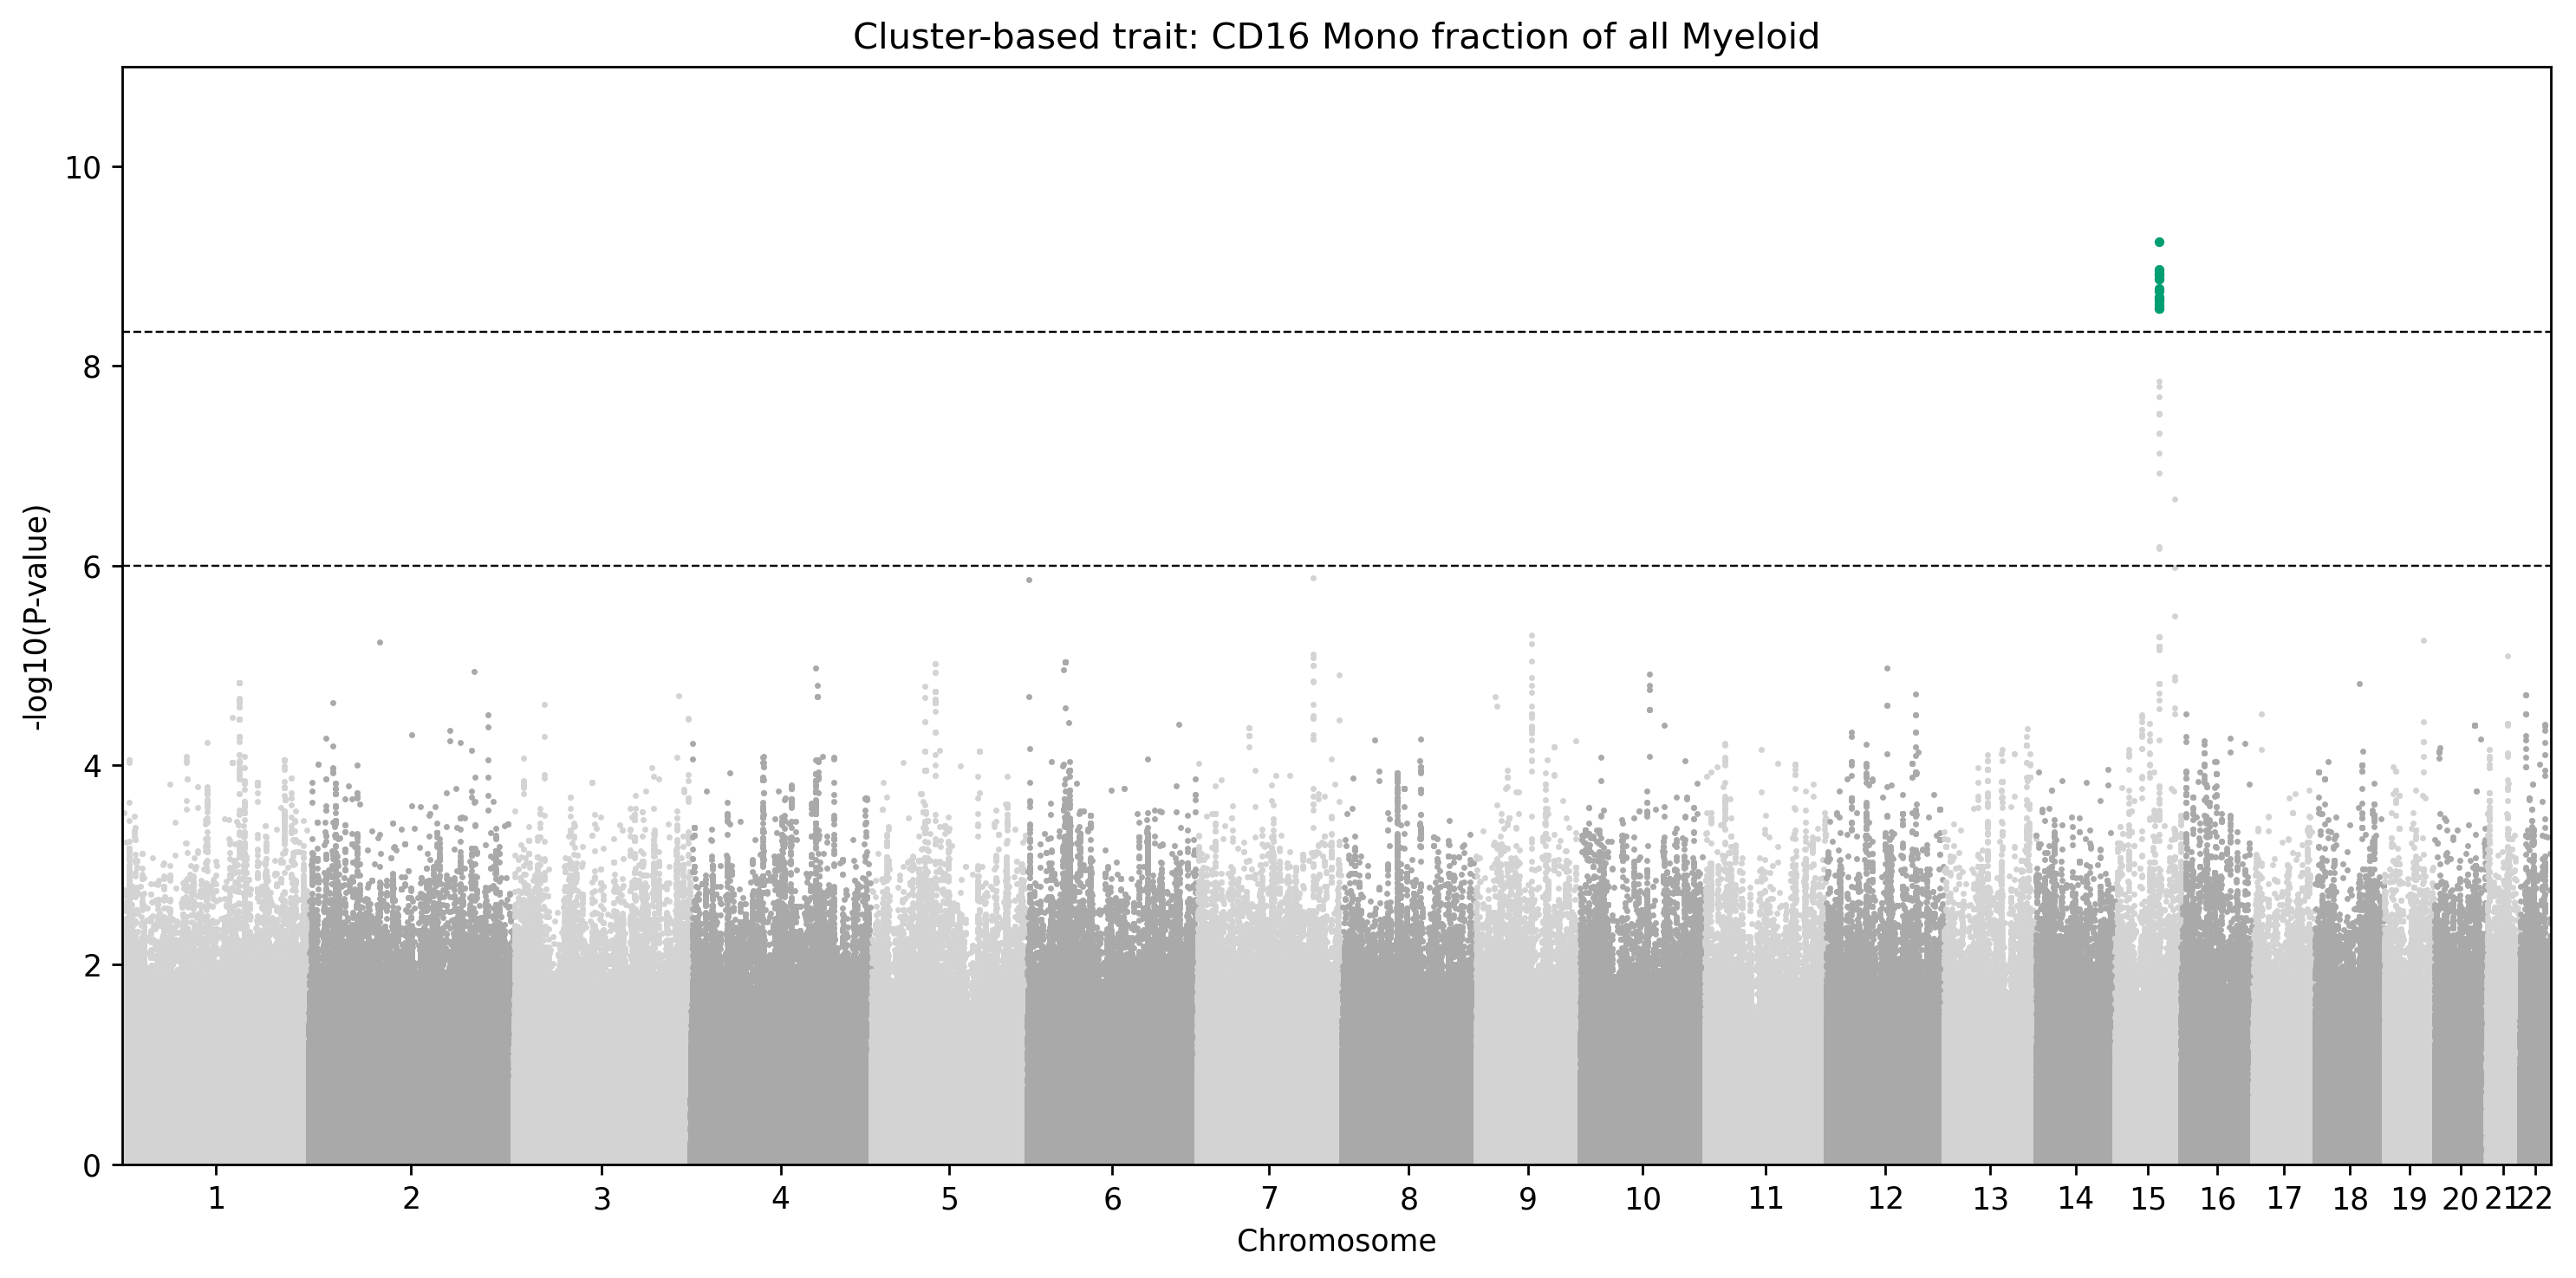

16


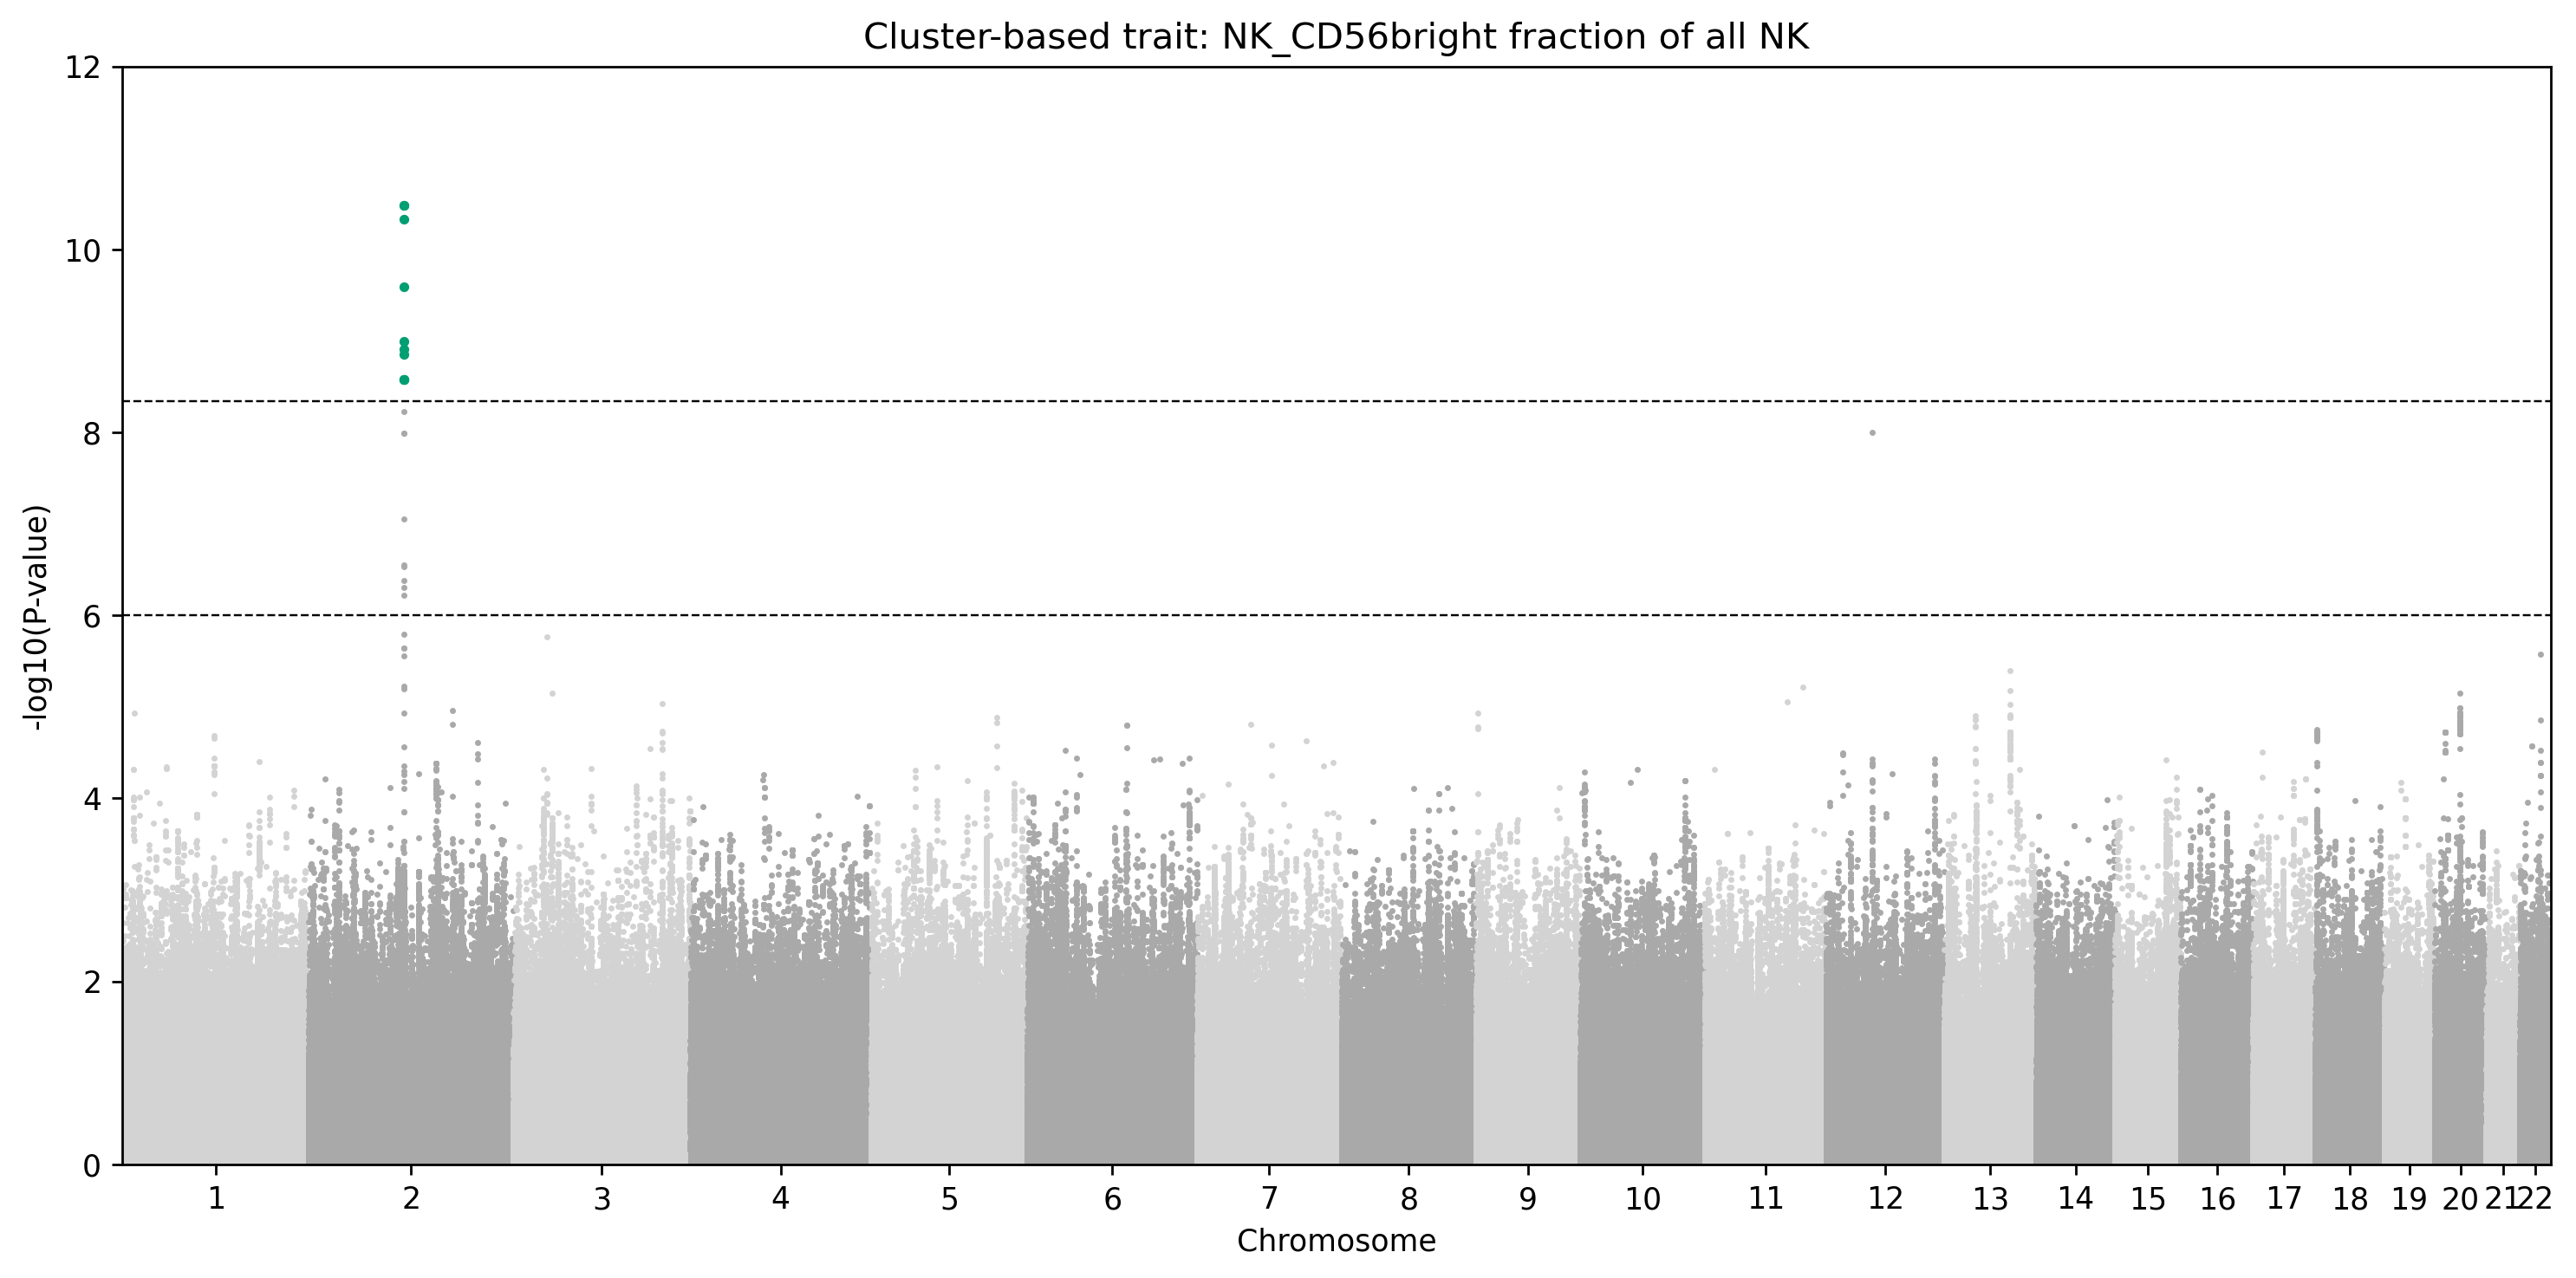

In [7]:
for i_trait in [14, 16]:
    print(i_trait)
    trait_filename="_".join(traits.columns[i_trait].split(" "))
    split_name = traits.columns[i_trait].split("_frac_")
    if split_name[1]=="allcells":
        trait_printname=split_name[0]+" fraction of all cells"
    else:
        trait_printname=" fraction of all ".join(split_name)
    
    # Load gwas results
    res = pd.read_csv(res_folder+"gwas_res/T"+str(i_trait+1)+".assoc.linear", 
                         delim_whitespace=True)
        
    res['log10p'] = -np.log10(res['P'])
    res['ind'] = range(res.shape[0])
    res_grouped = res.groupby(('CHR'))
    res = res.astype({'CHR':'string'})

    # Generate plot
    fig = plt.figure(figsize=(12, 6), dpi = 250) # Set the figure size
    ax = fig.add_subplot(111)
    colors = ['lightgrey', 'darkgrey']
    x_labels = []
    x_labels_pos = []
    for num, (name, group) in enumerate(res_grouped):
        group.plot(kind='scatter', x='ind', y='log10p',color=colors[num % len(colors)], ax=ax, s=1, rasterized = True)
        x_labels.append(name)
        x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
    ax.set_xticks(x_labels_pos)
    ax.set_xticklabels(x_labels)

    res.loc[res.P.values < gw_sig,:].plot(kind='scatter', x='ind', y='log10p',
       color=color_dict['green'], ax=ax, s=5, rasterized = True)

    # set axis limits
    ax.set_xlim([0, len(res)])
    ax.set_ylim([0, np.max([10,np.ceil(np.max(res.log10p))+1])])

    # x axis label
    ax.set_xlabel('Chromosome')
    ax.set_ylabel('-log10(P-value)')

    # Genomewide sig threshold
    ax.axhline(y=-np.log10(gw_sig), linestyle="--", color = "black", lw=0.7)
    ax.axhline(y=-np.log10(1e-06), linestyle="--", color = "black", lw=0.7)

    plt.title("Cluster-based trait: "+trait_printname)
    plt.tight_layout()
    plt.savefig(fig_dir+"cluster_gwas/gwas_"+trait_filename+".png", dpi = 300, transparent=True)
    plt.show()